In [124]:
import pandas as pd
from sklearn.model_selection  import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler #
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [89]:
data_tem=pd.DataFrame(pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv",sep=";"))


In [ ]:
## paso importante el escalado de los datos para encontrar la correlacciones ideales 

#print("la data tiene un total de nulos de ",data_tem.isnull())
print("la data tiene un total de nulos de ",data_tem.isnull().sum())

scaler=StandardScaler()
used=scaler.fit_transform(data_tem)
data_scaler=pd.DataFrame(used,columns=data_tem.columns)
print("reescalado con exito !!!!!")

la data tiene un total de nulos de  fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
reescalado con exito !!!!!


In [41]:
data_scaler

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,-0.787823
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,-0.787823
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,0.450848
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217796,0.403229,-0.980669,-0.382271,0.053845,1.542054,-0.075043,-0.978765,0.899886,-0.461180,0.072294,-0.787823
1595,-1.390155,0.123905,-0.877968,-0.240375,-0.541259,2.211469,0.137820,-0.862162,1.353436,0.601055,0.729364,0.450848
1596,-1.160343,-0.099554,-0.723916,-0.169427,-0.243707,1.255161,-0.196679,-0.533554,0.705508,0.542042,0.541630,0.450848
1597,-1.390155,0.654620,-0.775267,-0.382271,-0.264960,1.542054,-0.075043,-0.676657,1.677400,0.305990,-0.209308,-0.787823


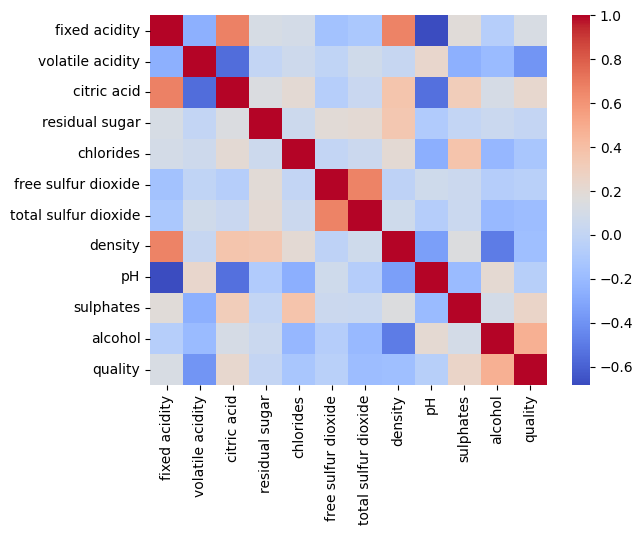

In [38]:
plt.figure()
sns.heatmap(data_scaler.cov(),cmap="coolwarm",annot=False)
plt.show()

In [123]:
## preparacion de los datos para el entrenamiento 
x=data_scaler.drop("quality",axis=1)
y=data_tem["quality"]
#bins = [-np.inf, -0.6, -0.3, 0.0, 0.3, 0.6, np.inf]
#labels = [0, 1, 2, 3, 4, 5]
#y_clases = pd.cut(y, bins=bins, labels=labels, right=False).astype(int)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=12)
model_gauss=RandomForestClassifier(random_state=12)
model_gauss.fit(x_train,y_train)
y_pred=model_gauss.predict(x_test)
## para medir el resultado de este modelo 
rend=accuracy_score(y_test,y_pred)*100
print("tenemos un exito de {:.3f} %".format(rend))

tenemos un exito de 70.536 %


In [129]:
matrix_conf=confusion_matrix(y_test,y_pred)
print(matrix_conf)

[[  0   1   1   0   0   0]
 [  0   0   6   4   0   0]
 [  0   1 199  46   2   0]
 [  0   1  47 163  20   1]
 [  0   0   3  28  33   0]
 [  0   0   0   2   2   0]]


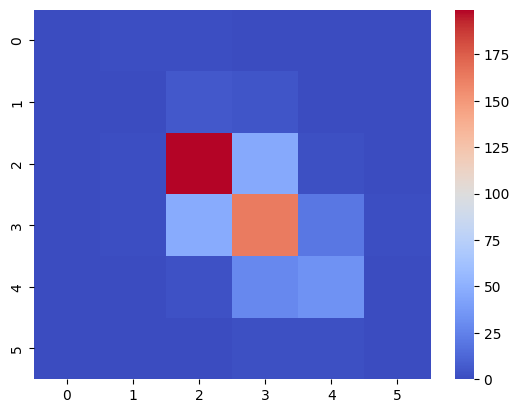

In [130]:
plt.figure()
sns.heatmap(matrix_conf,cmap="coolwarm",annot=False,fmt='d')
plt.show()